In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

#from sklearn import LinearModel, LinearRegression
#from sklearn.base import RegressorMixin
#from scipy.optimize import minimize

# Datasets import:
from sklearn import datasets

#%%matplotlib notebook

In [2]:
df = pd.read_csv("data_dm3.csv",header=None)
A = np.array(df)
print(A.shape)
X = A[:,range(A.shape[1]-1)]      #on récupère les covariables
Y = A[:,(A.shape[1]-1)]           #puis l'output

n, d = X.shape
print("La dimension de la matrice X est: {0} x {1}".format(n, d))

(442, 211)
La dimension de la matrice X est: 442 x 210


In [3]:
print("Afin de s'assurer que l'on calcule les moyennes et les variances pour",
      " les bonnes variables.\n On regarde si les tailles coincident. C'est",
 np.allclose(X.mean(axis=0).shape[0] , d)  )

print("Les variables explicatives sont-elles \n centrées? {0}\n réduites? {1} ".
      format(np.allclose (X.mean(axis=0) ,0 ) ,  np.allclose (X.std(axis=0) ,1 ) )
 )

print("La variable à expliquer est-elle \n centrée? {0}\n réduite? {1} ".
      format(np.allclose (Y.mean(axis=0) ,0 ) ,  np.allclose (Y.std(axis=0) ,1 ) )
 )

Afin de s'assurer que l'on calcule les moyennes et les variances pour  les bonnes variables.
 On regarde si les tailles coincident. C'est True
Les variables explicatives sont-elles 
 centrées? True
 réduites? True 
La variable à expliquer est-elle 
 centrée? False
 réduite? False 


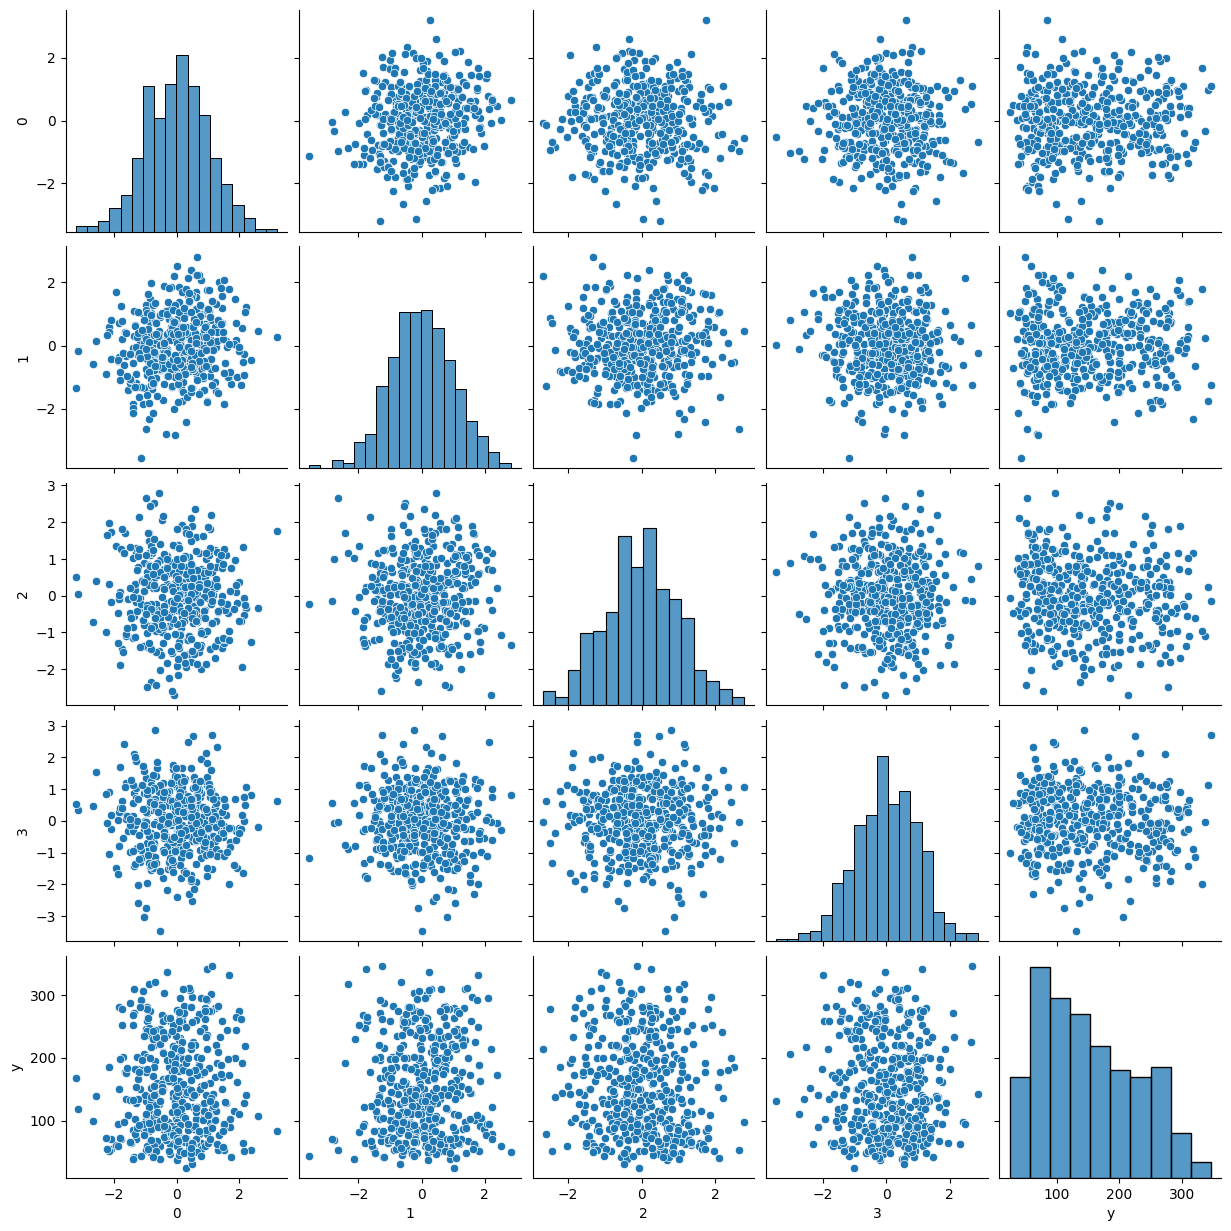

In [5]:
import seaborn as sns
import pandas as pd

#sns.set(style="ticks")
df_sub = pd.DataFrame(X[:,np.random.choice(range(210),4)])
df_sub['y'] = Y
df_sub
sns.pairplot(df_sub)

<Axes: >

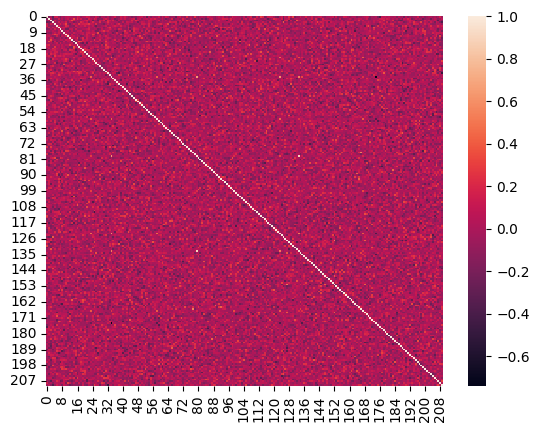

In [6]:
df = pd.DataFrame(X)
sns.heatmap(df.corr())

In [7]:
var = np.cov(np.cov(X,rowvar = False))
U, s, V = np.linalg.svd(var, full_matrices=True)

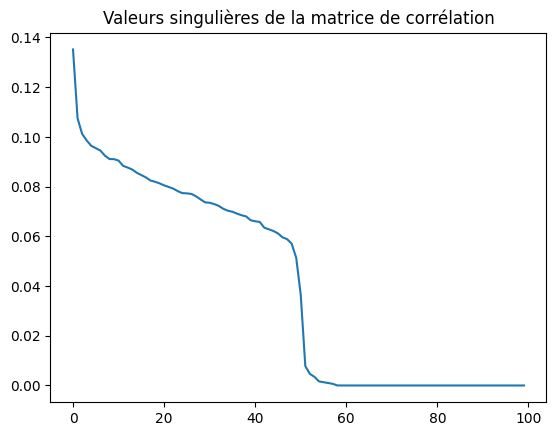

In [8]:
fig = plt.figure()
plt.plot(s[0:100])
plt.title('Valeurs singulières de la matrice de corrélation')
plt.show()

In [9]:
elbow = 60 #50

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, X_test.shape)

(353, 210) (89, 210)


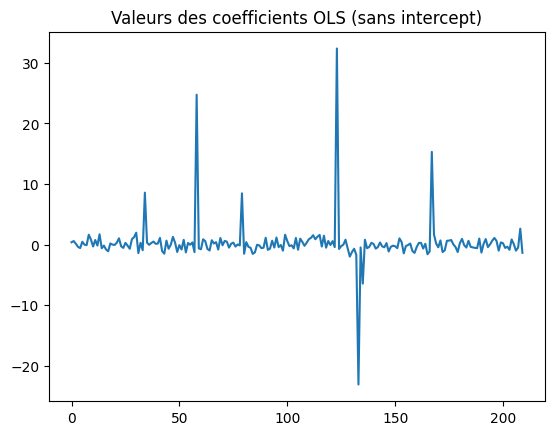

In [11]:
from sklearn import linear_model

regr0 = linear_model.LinearRegression()
regr0.fit(X_train , y_train)

fig = plt.figure()
plt.plot(regr0.coef_)
plt.title('Valeurs des coefficients OLS (sans intercept)')
plt.show()

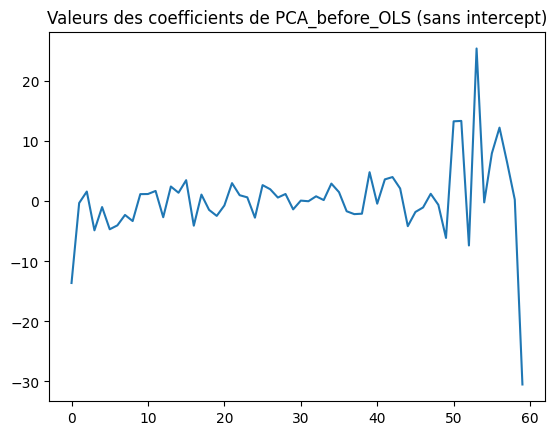

In [12]:
X_train_reduce = np.dot(X_train, U[:,0:elbow])
X_test_reduce = np.dot(X_test, U[:,0:elbow])

regr1 = linear_model.LinearRegression()
regr1.fit(X_train_reduce , y_train)

fig = plt.figure()
plt.plot(np.r_[regr1.coef_])
plt.title('Valeurs des coefficients de PCA_before_OLS (sans intercept)')
plt.show()